In [2]:
import numpy as np

In [3]:
import pandas as pd

In [4]:
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
from  sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
from sklearn.neighbors import KNeighborsClassifier

In [10]:
from sklearn.metrics import f1_score

In [11]:
from sklearn.metrics import classification_report, confusion_matrix

In [12]:
import warnings

In [13]:
import pickle

In [14]:
from scipy import stats

In [15]:
warnings.filterwarnings('ignore')

In [16]:
plt.style.use('fivethirtyeight')

In [17]:
df=pd.read_excel('/content/Data_Train.xlsx')



In [18]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [19]:
df.shape

(10683, 11)

In [20]:

df.Date_of_Journey=df.Date_of_Journey.str.split('/')

In [21]:
df.Date_of_Journey

0        [24, 03, 2019]
1         [1, 05, 2019]
2         [9, 06, 2019]
3        [12, 05, 2019]
4        [01, 03, 2019]
              ...      
10678     [9, 04, 2019]
10679    [27, 04, 2019]
10680    [27, 04, 2019]
10681    [01, 03, 2019]
10682     [9, 05, 2019]
Name: Date_of_Journey, Length: 10683, dtype: object

In [22]:
#Since the maximum number of stops is 4, there should be maxium 6 citles in any particular route. We split the data in route col
df.Route=df.Route.str.split('->')

In [23]:
df.Route

0                    [BLR → DEL]
1        [CCU → IXR → BBI → BLR]
2        [DEL → LKO → BOM → COK]
3              [CCU → NAG → BLR]
4              [BLR → NAG → DEL]
                  ...           
10678                [CCU → BLR]
10679                [CCU → BLR]
10680                [BLR → DEL]
10681                [BLR → DEL]
10682    [DEL → GOI → BOM → COK]
Name: Route, Length: 10683, dtype: object

In [24]:
#In the similar manner, We split the Dep_time column, and create  separate columns for departure hours and minitus-
df.Dep_Time.str.split(':')

0        [22, 20]
1        [05, 50]
2        [09, 25]
3        [18, 05]
4        [16, 50]
           ...   
10678    [19, 55]
10679    [20, 45]
10680    [08, 20]
10681    [11, 30]
10682    [10, 55]
Name: Dep_Time, Length: 10683, dtype: object

In [25]:
df['Dep_Time_Hour']=df.Dep_Time.str[0]
df['Dep_Time_Hour']=df.Dep_Time.str[1]

In [26]:
df.Arrival_Time=df.Arrival_Time.str.split('')


In [27]:
df['Arrival_date'] = df.Arrival_Time.str[1]
df['Time_of_Arrival'] = df.Arrival_Time.str[0]

In [28]:
df['Time_of_Arrival']=df.Time_of_Arrival.str.split(':')

In [29]:
df['Arrival_Time_Hour']=df.Time_of_Arrival.str[0]
df['Arrival_Time_Mins']=df.Time_of_Arrival.str[1]

In [30]:
df.Duration=df.Duration.str.split('')

In [31]:
df['Travel_Hours']=df.Duration.str[0]
df['Travel_Hours']=df['Travel_Hours'].str.split('h')
df['Travel_Hours']=df['Travel_Hours'].str[0]
df.Travel_Hours=df.Travel_Hours
df['Travel_Mins']=df.Duration.str[1]

In [32]:
df.Travel_Mins=df.Travel_Mins.str.split('m')
df.Travel_Mins=df.Travel_Mins.str[0]

In [33]:
df.Total_Stops.replace('non_stop',0,inplace=True)
df.Total_Stops=df.Total_Stops.str.split('')
df.Total_Stops=df.Total_Stops.str[0]

In [34]:
df.Additional_Info.unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [35]:
df.Additional_Info.replace('NO Info','No info',inplace=True)

In [36]:
df.isnull().sum()

Airline                  0
Date_of_Journey          0
Source                   0
Destination              0
Route                    1
Dep_Time                 0
Arrival_Time             0
Duration                 0
Total_Stops              1
Additional_Info          0
Price                    0
Dep_Time_Hour            0
Arrival_date             0
Time_of_Arrival          0
Arrival_Time_Hour        0
Arrival_Time_Mins    10683
Travel_Hours             0
Travel_Mins              0
dtype: int64

In [37]:
df.dropna(inplace=True)

In [38]:
df.isnull().sum()

Airline              0.0
Date_of_Journey      0.0
Source               0.0
Destination          0.0
Route                0.0
Dep_Time             0.0
Arrival_Time         0.0
Duration             0.0
Total_Stops          0.0
Additional_Info      0.0
Price                0.0
Dep_Time_Hour        0.0
Arrival_date         0.0
Time_of_Arrival      0.0
Arrival_Time_Hour    0.0
Arrival_Time_Mins    0.0
Travel_Hours         0.0
Travel_Mins          0.0
dtype: float64

In [39]:
df.fillna('None',inplace=True)

In [40]:
df.fillna(df,inplace=True)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Airline            0 non-null      object 
 1   Date_of_Journey    0 non-null      object 
 2   Source             0 non-null      object 
 3   Destination        0 non-null      object 
 4   Route              0 non-null      object 
 5   Dep_Time           0 non-null      object 
 6   Arrival_Time       0 non-null      object 
 7   Duration           0 non-null      object 
 8   Total_Stops        0 non-null      object 
 9   Additional_Info    0 non-null      object 
 10  Price              0 non-null      int64  
 11  Dep_Time_Hour      0 non-null      object 
 12  Arrival_date       0 non-null      object 
 13  Time_of_Arrival    0 non-null      object 
 14  Arrival_Time_Hour  0 non-null      object 
 15  Arrival_Time_Mins  0 non-null      float64
 16  Travel_Hours       0 non-null      obj

In [42]:
df.rename_axis 

<bound method NDFrame.rename_axis of Empty DataFrame
Columns: [Airline, Date_of_Journey, Source, Destination, Route, Dep_Time, Arrival_Time, Duration, Total_Stops, Additional_Info, Price, Dep_Time_Hour, Arrival_date, Time_of_Arrival, Arrival_Time_Hour, Arrival_Time_Mins, Travel_Hours, Travel_Mins]
Index: []>

In [43]:
index=index_mapper, columns=columns_mapper,axis={'index', 'columns'}

In [44]:
df.Travel_Hours=df.Travel_Hours.astype('int64')

In [45]:
egorical=['Airline','Source','Destination','Additional_Info','City1']
numerical=['Date','Montcath','Year','Dep_Time_Hour','Dep_Time_Mins','Arrival_date','Arrival_Time_Hour','Arrival_Time_Mins','Travel_Hours','Trval_Mins']

In [46]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Dep_Time_Hour,Arrival_date,Time_of_Arrival,Arrival_Time_Hour,Arrival_Time_Mins,Travel_Hours,Travel_Mins


In [47]:
egorical=['Airline','Source','Destination','Additional_Info','City1']
numerical=['Date','Montcath','Year','Dep_Time_Hour','Dep_Time_Mins','Arrival_date','Arrival_Time_Hour','Arrival_Time_Mins','Travel_Hours','Trval_Mins']

In [48]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [49]:
pd.set_option('display.max_columns',33)


In [50]:
df = pd.read_excel('/content/Data_Train.xlsx')

In [51]:
# Applying label encoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [52]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [53]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [54]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

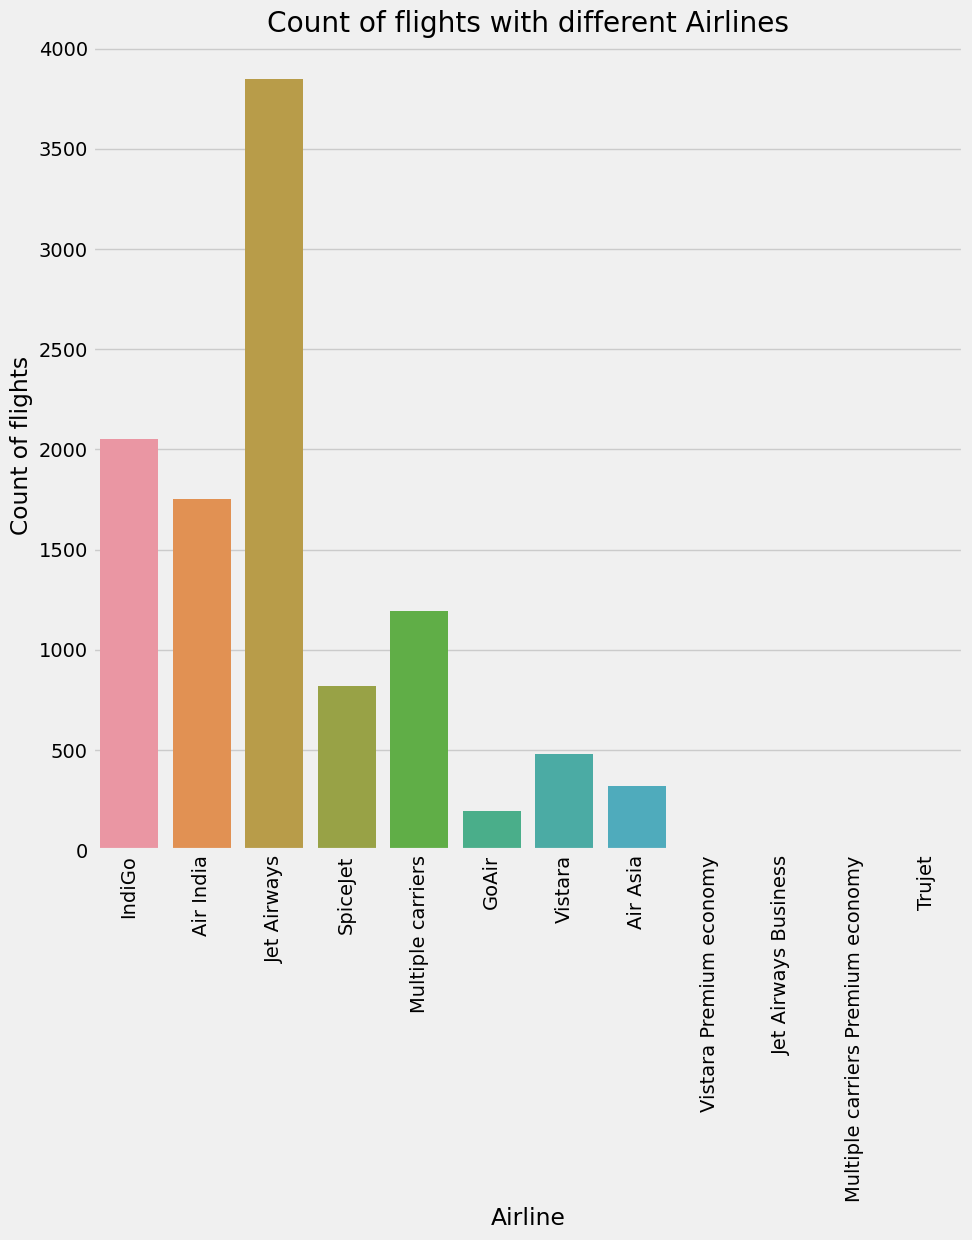

In [55]:
plt.figure(figsize = (10, 10))
plt.title('Count of flights with different Airlines')
sns.countplot(x = 'Airline', data = df)
plt.xlabel('Airline')
plt.ylabel('Count of flights')
plt.xticks(rotation = 90)  

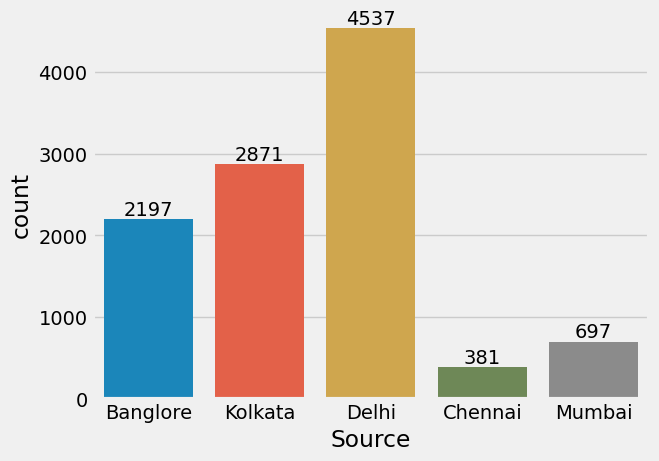

In [56]:
## Number of Flights From Each Source
ax = sns.countplot(data=df,x='Source')
ax.bar_label(ax.containers[0]);

Text(0, 0.5, 'Count of flights')

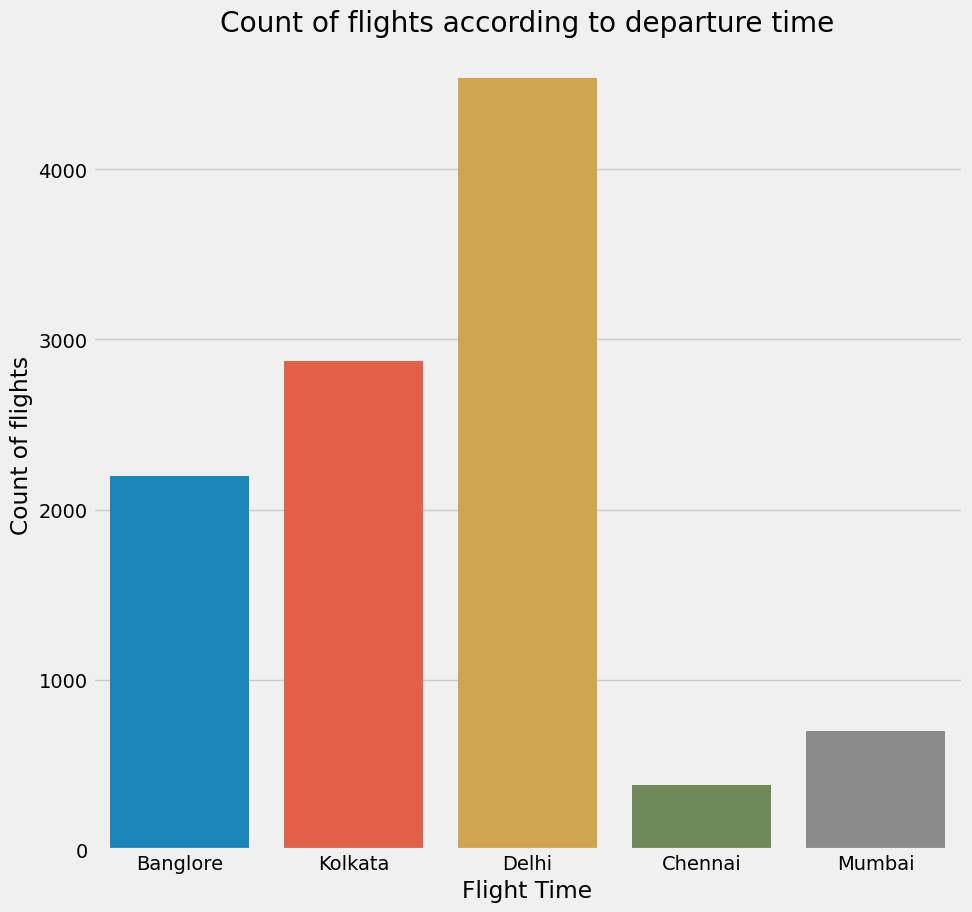

In [57]:
plt.figure(figsize = (10, 10))
plt.title('Count of flights according to departure time')
sns.countplot(x = 'Source', data = df)
plt.xlabel('Flight Time')
plt.ylabel('Count of flights')

<Axes: xlabel='Destination', ylabel='Price'>

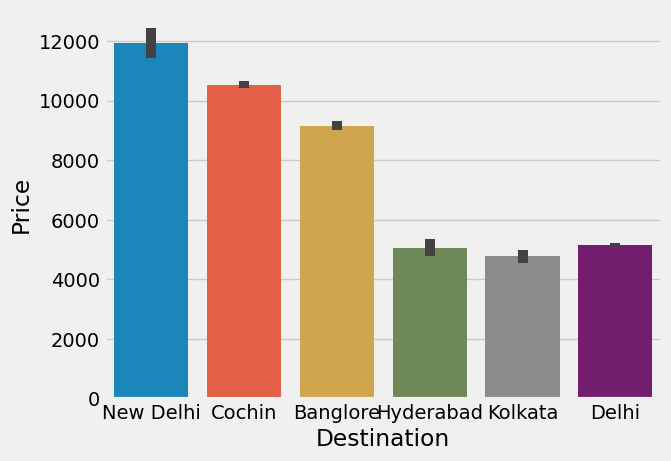

In [58]:
# We can make Visualization With Avg. Price for Destination
sns.barplot(x='Destination',y='Price',data=df.sort_values('Price',ascending=False))

<Axes: xlabel='Total_Stops', ylabel='Price'>

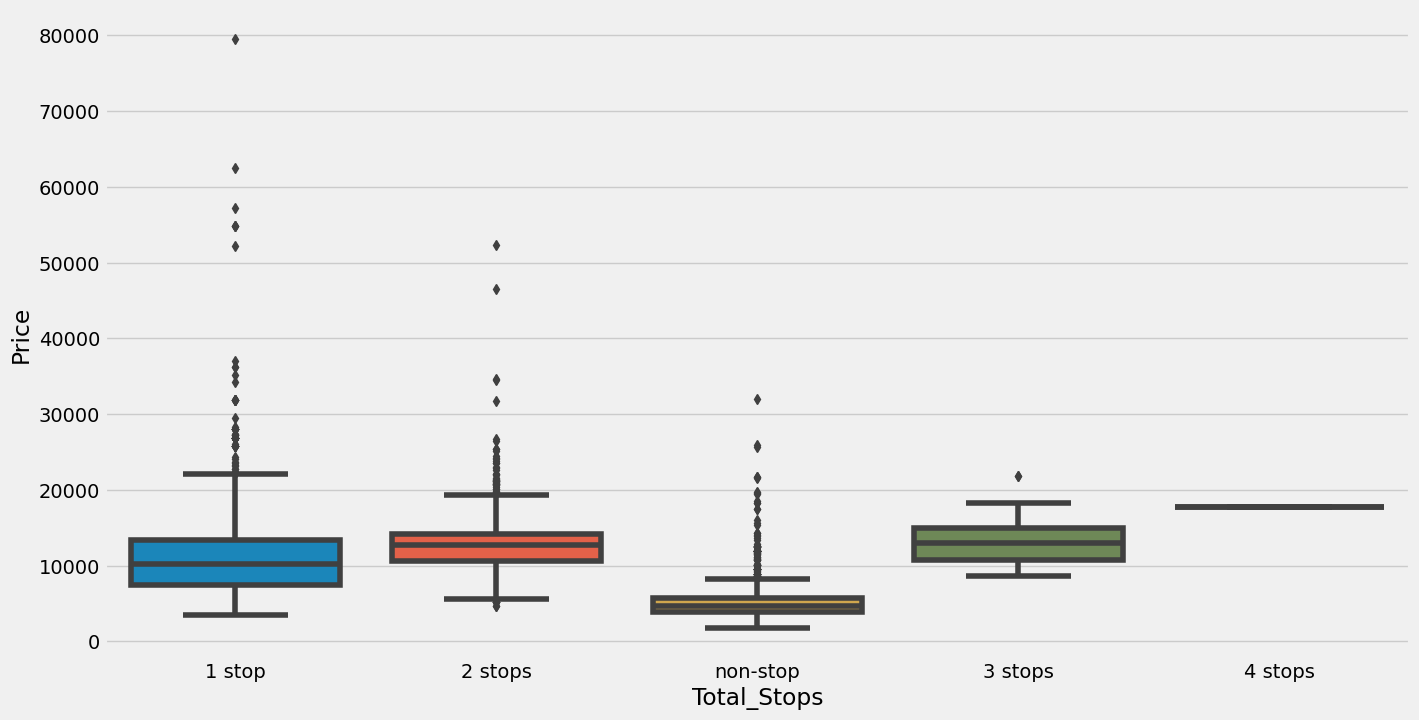

In [59]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Total_Stops',y='Price',data=df.sort_values('Price',ascending=False))

In [60]:
#plotting countplots for categorical df

In [61]:
import seaborn as sns
c=1
plt.figure(figsize=(20,45))

<Figure size 2000x4500 with 0 Axes>

<Figure size 2000x4500 with 0 Axes>

<function matplotlib.pyplot.show(close=None, block=None)>

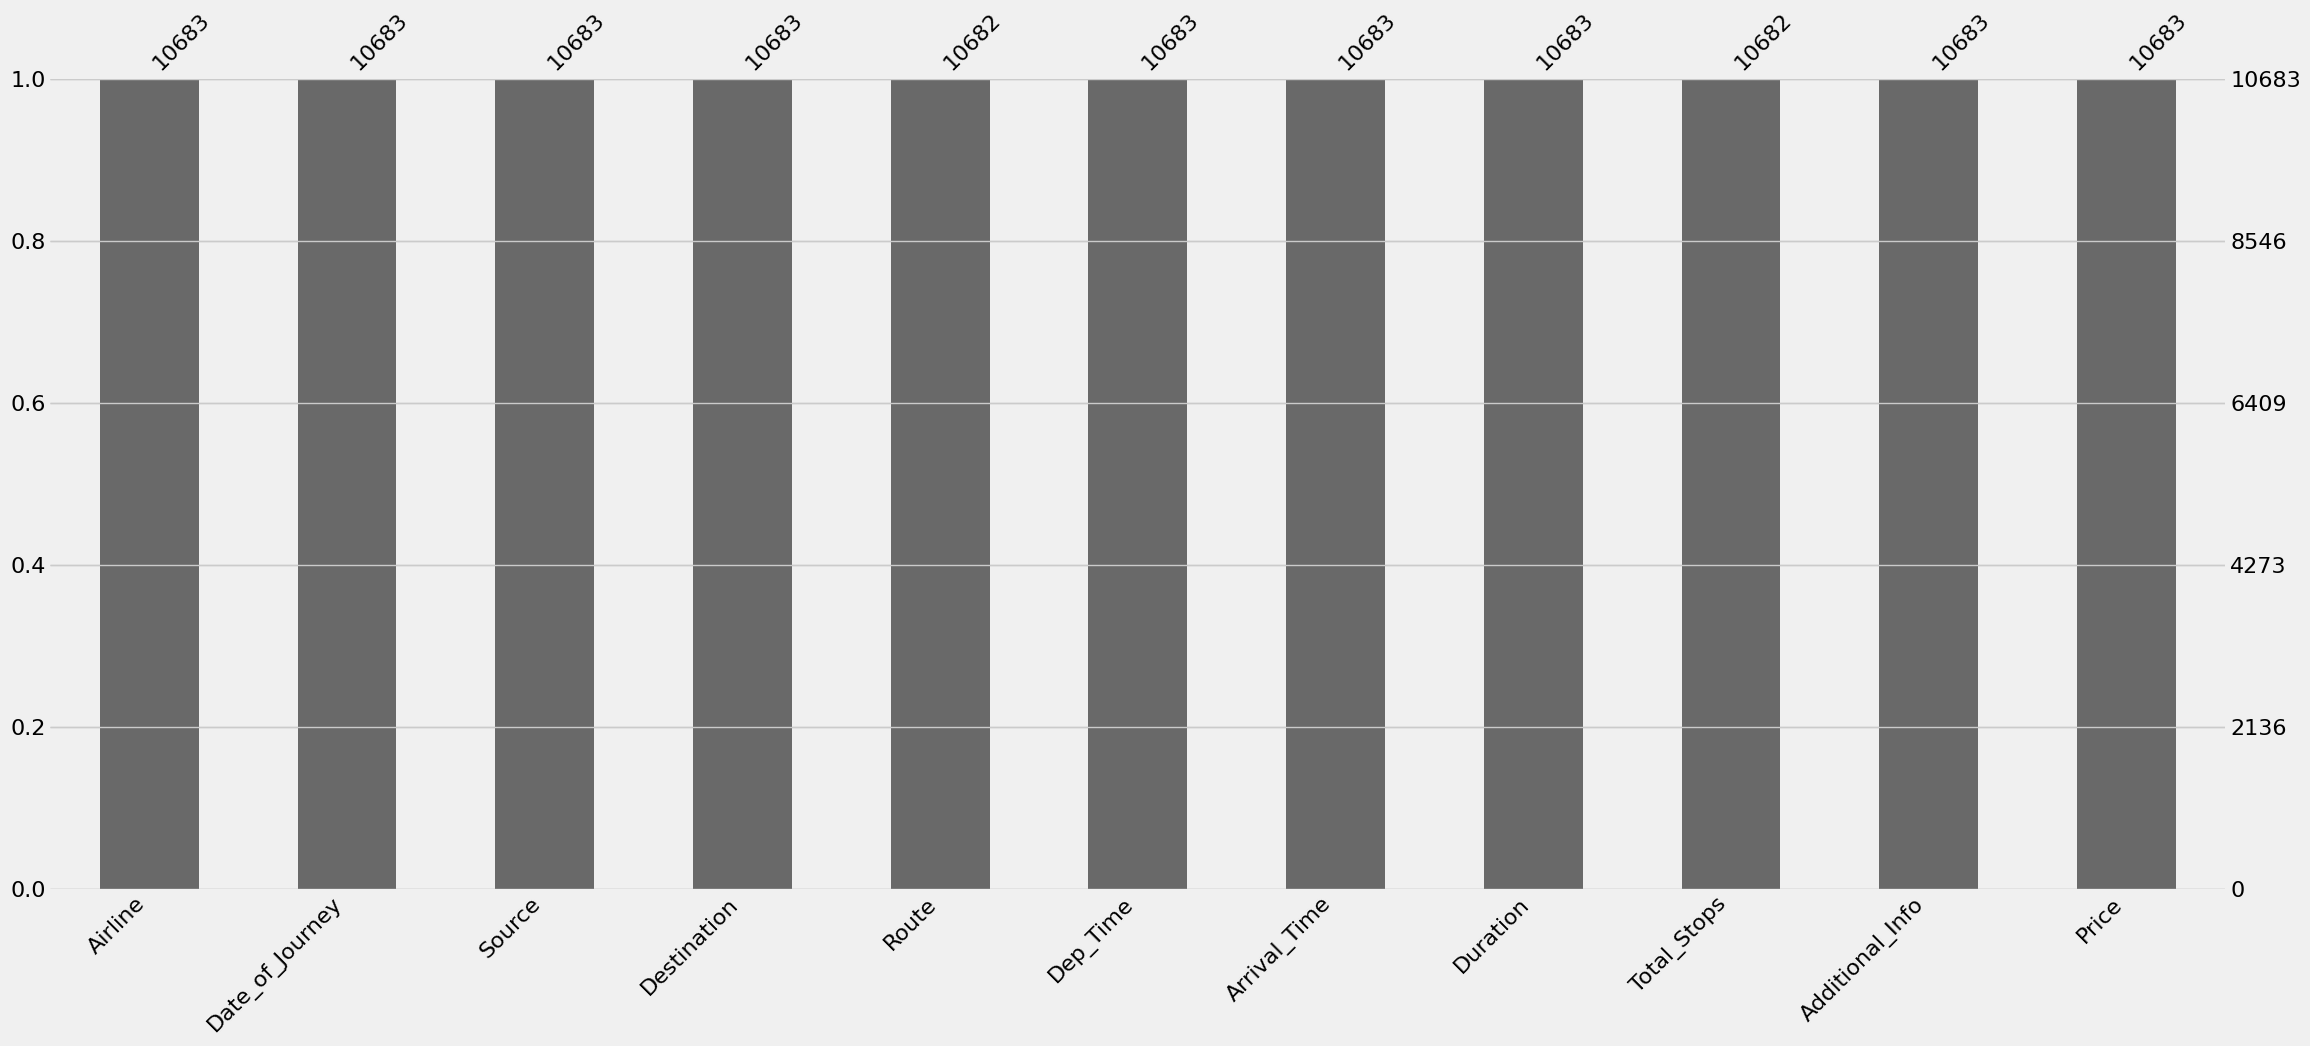

In [62]:
import missingno as msno
msno.bar(df)
plt.show


<Axes: xlabel='Price', ylabel='Density'>

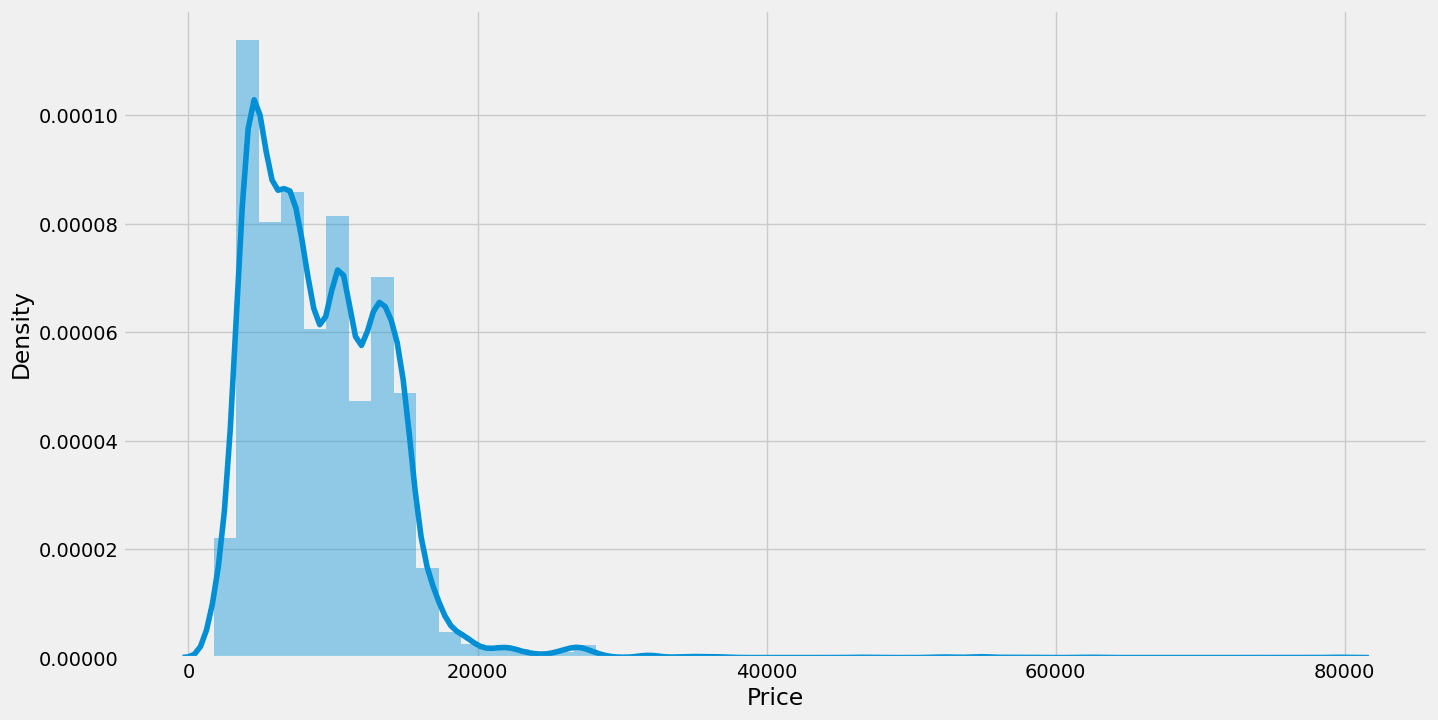

In [63]:
plt.figure(figsize=(15,8))
sns.distplot(df.Price)

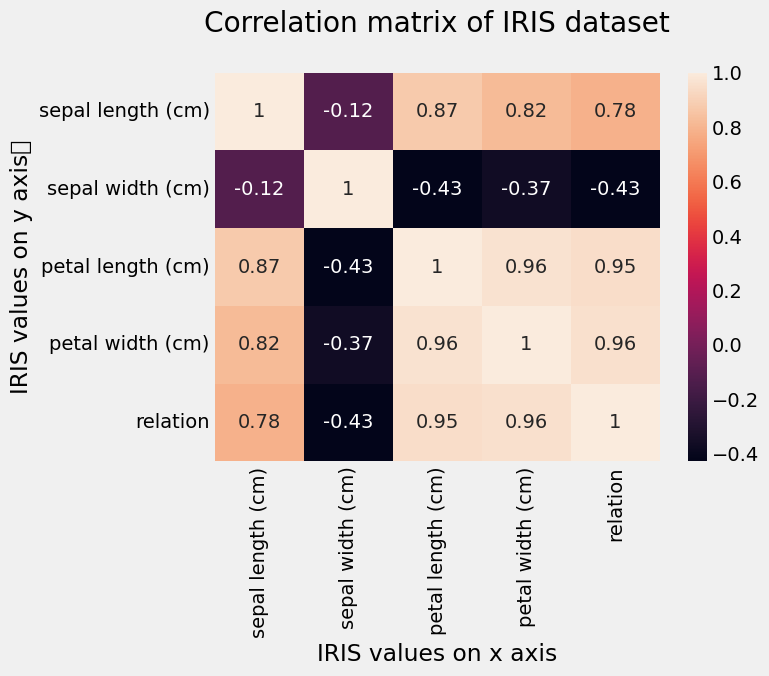

In [64]:
from sklearn import datasets  
import pandas as p  
import seaborn  
import matplotlib. pyplot as pt  
dataset = datasets. load_iris ()  
dataframe = p. DataFrame (data = dataset. data, columns = dataset. feature_names)  
dataframe ["relation"] = dataset. target  
correlation = dataframe.corr ()  
heatmap = seaborn. heatmap(correlation, annot = True)  
heatmap.set (xlabel = 'IRIS values on x axis',ylabel = 'IRIS values on y axis\t', title = "Correlation matrix of IRIS dataset\n")  
pt. show ()  


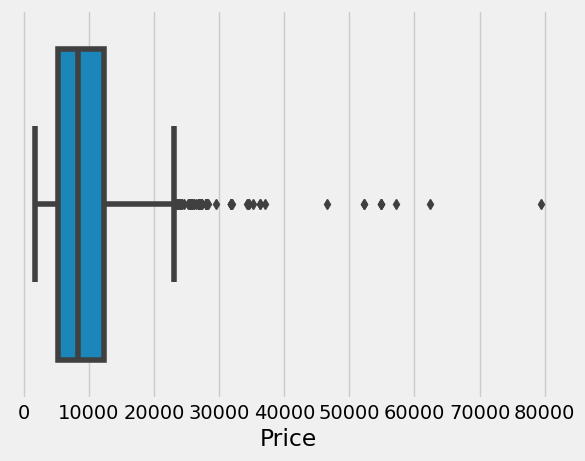

In [65]:
sns.boxplot(x= 'Price', data=df);

In [66]:
y=df['Price']
x=df.drop(columns=['Price'],axis=1)

In [67]:
### Scaling the df

In [68]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [69]:
def plot(data,col):
    fig,(ax1,ax2)=plt.subplots(2,1)
    sns.distplot(data[col],ax=ax1)
    sns.boxplot(data[col],ax=ax2)

In [70]:
data1=pd.set_option('display.max_columns',33)
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [71]:
def plot(data,col):
    fig,(ax1,ax2)=plt.subplots(2,1)
    sns.distplot(data[col],ax=ax1)
    sns.boxplot(data[col],ax=ax2)

In [72]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [73]:
train_data=pd.read_excel('/content/Data_Train.xlsx')
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [74]:
test_data=pd.read_excel('/content/Data_Train.xlsx')
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [75]:
tain_data=train_data[train_data['Total_Stops'].notnull()]

In [76]:
train_data['Total_Stops']=train_data['Total_Stops'].str[0]
test_data['Total_Stops']=test_data['Total_Stops'].str[0]

In [77]:
train_data['Total_Stops']=train_data['Total_Stops'].apply(lambda x : str(x)if str(x).isdigit() else 0 ).astype('int64')
test_data['Total_Stops']=test_data['Total_Stops'].apply(lambda x : str(x)if str(x).isdigit() else 0 ).astype('int64')

In [78]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
rfr=RandomForestRegressor()
gb=GradientBoostingRegressor()
ad=AdaBoostRegressor()

In [79]:
from sklearn.feature_selection import mutual_info_classif

In [80]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
def predict(ml_model):
    print('Model is: {}'.format(ml_model))
    model= ml_model.fit(X_train,y_train)
    print("Training score: {}".format(model.score(X_train,y_train)))
    predictions = model.predict(X_test)
    print("Predictions are: {}".format(predictions))
    print('\n')
    r2score=r2_score(y_test,predictions) 
    print("r2 score is: {}".format(r2score))
          
    print('MAE:{}'.format(mean_absolute_error(y_test,predictions)))
    print('MSE:{}'.format(mean_squared_error(y_test,predictions)))
    print('RMSE:{}'.format(np.sqrt(mean_squared_error(y_test,predictions))))
    sns.distplot(y_test-predictions) 
     

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor

In [82]:
RandomForestRegressor()

RandomForestRegressor()

In [83]:
#crwating list of category columns 

category=['Airline','Source','Destination','Additional-Info']
category

['Airline', 'Source', 'Destination', 'Additional-Info']

In [84]:
df['Date_of_Journey'].unique(),df['Date_of_Journey'].nunique()

(array(['24/03/2019', '1/05/2019', '9/06/2019', '12/05/2019', '01/03/2019',
        '24/06/2019', '12/03/2019', '27/05/2019', '1/06/2019',
        '18/04/2019', '9/05/2019', '24/04/2019', '3/03/2019', '15/04/2019',
        '12/06/2019', '6/03/2019', '21/03/2019', '3/04/2019', '6/05/2019',
        '15/05/2019', '18/06/2019', '15/06/2019', '6/04/2019',
        '18/05/2019', '27/06/2019', '21/05/2019', '06/03/2019',
        '3/06/2019', '15/03/2019', '3/05/2019', '9/03/2019', '6/06/2019',
        '24/05/2019', '09/03/2019', '1/04/2019', '21/04/2019',
        '21/06/2019', '27/03/2019', '18/03/2019', '12/04/2019',
        '9/04/2019', '1/03/2019', '03/03/2019', '27/04/2019'], dtype=object),
 44)

In [85]:
from sklearn.feature_selection import mutual_info_classif

In [86]:
# Helper funtion to plot and check parameter values


def test_params_and_plot(param_name,values):
    train_errors , val_errors = [] , []
    for value in values:
        params = {param_name: value}
        train_rmse,test_rmse = test_params(**params)
        train_errors.append(train_rmse)
        val_errors.append(test_rmse)
    plt.figure(figsize=(16,8))
    plt.title('Overfitting curve:  params')
    plt.plot(values, train_errors, 'g-*')
    plt.plot(values, val_errors, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('rmse')
    plt.legend(['Training', 'Test'])

In [87]:
from sklearn.feature_selection import mutual_info_classif

In [88]:
def get_scores(models,xtrain,ytrain):
    for name,model in models.items():
        model["model"].fit(xtrain,ytrain)

        score_r2 = score_dataset(xtrain, ytrain, model=model["model"])
        score = {'model':"Linear regression", 'score_r2':score_r2}
        print("--- "+name+" ---")
        print("Score r2: {}".format(score_r2))
        print("\n")

In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor

In [90]:
RandomForestRegressor()

RandomForestRegressor()

In [91]:
KNeighborsRegressor()


KNeighborsRegressor()

In [92]:
from sklearn.model_selection import cross_val_score
for i in range(2,5):
    print(rfr,df.mean())

RandomForestRegressor() Price    9087.064121
dtype: float64
RandomForestRegressor() Price    9087.064121
dtype: float64
RandomForestRegressor() Price    9087.064121
dtype: float64


In [93]:
from sklearn.model_selection import RandomizedSearchCV

In [94]:
param_grid={'n_estimators':[10,30,50,70,100],'max_depth':[None,1,2,3],'max_features':['auto','sqrt']}
rfr=RandomForestRegressor()
rf_res=RandomizedSearchCV(estimator=rfr,param_distributions=param_grid,cv=3,verbose=2,n_jobs=-1)


rf_res.fit

<bound method BaseSearchCV.fit of RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [None, 1, 2, 3],
                                        'max_features': ['auto', 'sqrt'],
                                        'n_estimators': [10, 30, 50, 70, 100]},
                   verbose=2)>

In [95]:
gb=GradientBoostingRegressor()
gb_res=RandomizedSearchCV(estimator=gb,param_distributions=param_grid,cv=3,verbose=2,n_jobs=-1)

gb_res.fit

<bound method BaseSearchCV.fit of RandomizedSearchCV(cv=3, estimator=GradientBoostingRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [None, 1, 2, 3],
                                        'max_features': ['auto', 'sqrt'],
                                        'n_estimators': [10, 30, 50, 70, 100]},
                   verbose=2)>

In [96]:
rfr.fit
y_train_pred=rfr.predict
y_test_pred=rfr.predict
print("train accuracy",r2_score)
print("test accuracy",r2_score)

train accuracy <function r2_score at 0x7f84cdc9b9d0>
test accuracy <function r2_score at 0x7f84cdc9b9d0>


In [97]:
knn=KNeighborsRegressor(n_neighbors=2,algorithm='auto',metric_params=None,n_jobs=-1)
knn.fit
y_train_pred=rfr.predict
y_test_pred=rfr.predict
print("train accuracy",r2_score)
print("test accuracy",r2_score)


train accuracy <function r2_score at 0x7f84cdc9b9d0>
test accuracy <function r2_score at 0x7f84cdc9b9d0>


In [98]:
rfr=RandomForestRegressor(n_estimators=10,max_features='sqrt',max_depth=None)
rfr.fit
y_train_pred=rfr.predict
y_test_pred=rfr.predict
print("train accuracy",r2_score)
print("test accuracy",r2_score)

train accuracy <function r2_score at 0x7f84cdc9b9d0>
test accuracy <function r2_score at 0x7f84cdc9b9d0>


In [99]:
price_list=pd.DataFrame({'Price'})

price_list

,0
0,Price


In [100]:
price_list

,0
0,Price


In [101]:
import pickle

In [102]:
!pip install flask-ngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [103]:
pickle.dump(rfr,open('model1.pkl','wb'))

In [104]:
from flask import Flask, render_template, request
import numpy as np
import pickle

In [105]:
model = (open(r"model1.pkl",'rb'))

In [106]:
("/home")
def home():
    return render_template('home.html')

In [107]:
("/predict")
def home1():
    return render_template('predict.html')

def predict():

    print(x)

    x = np.array(x)
    print(x.shape)

    print(x)
    pred = model.predict(x)
    print(pred)
    return render_template('submit.html', prediction_text=pred)

In [110]:
 !pip install nbconvert

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
